In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [16]:
from google.colab import files

uploaded = files.upload()

Saving penguin-species.csv to penguin-species (1).csv


In [28]:
data = pd.read_csv('penguin-species.csv');

In [29]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [31]:
data.shape

(344, 5)

In [32]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

data.fillna(data.mean(), inplace=True)


In [38]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

In [34]:
print("Missing values after handling:", data.isnull().sum())

Missing values after handling: culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64


In [43]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = model.fit_predict(data)

<Figure size 1200x600 with 0 Axes>

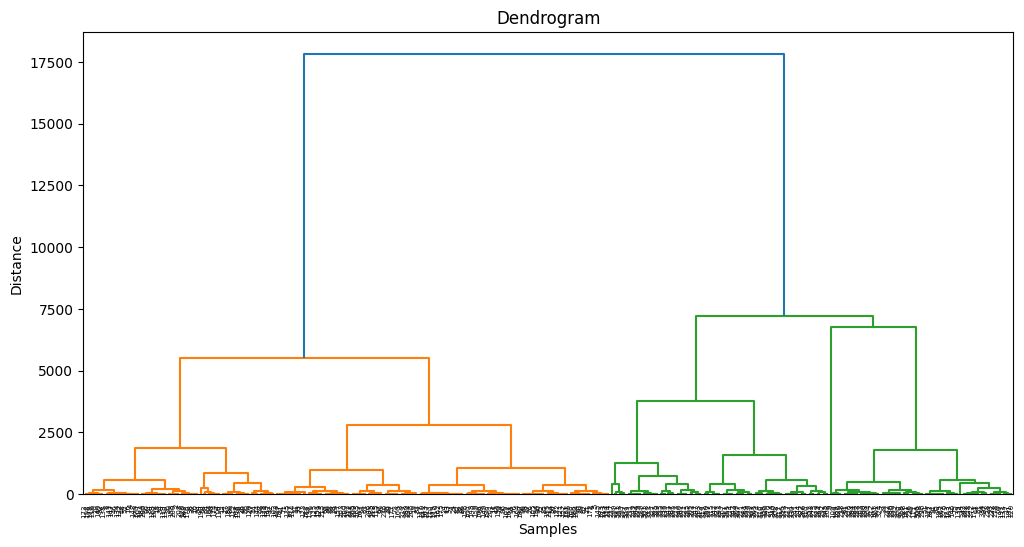

In [48]:
from scipy.cluster.hierarchy import dendrogram as scipy_dendrogram, linkage

plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
dendro = scipy_dendrogram(linkage(data.values, method='ward', metric='euclidean'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

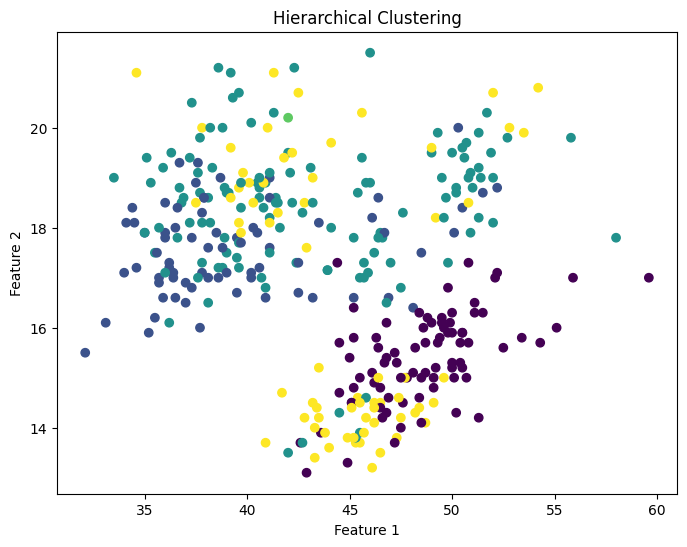

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

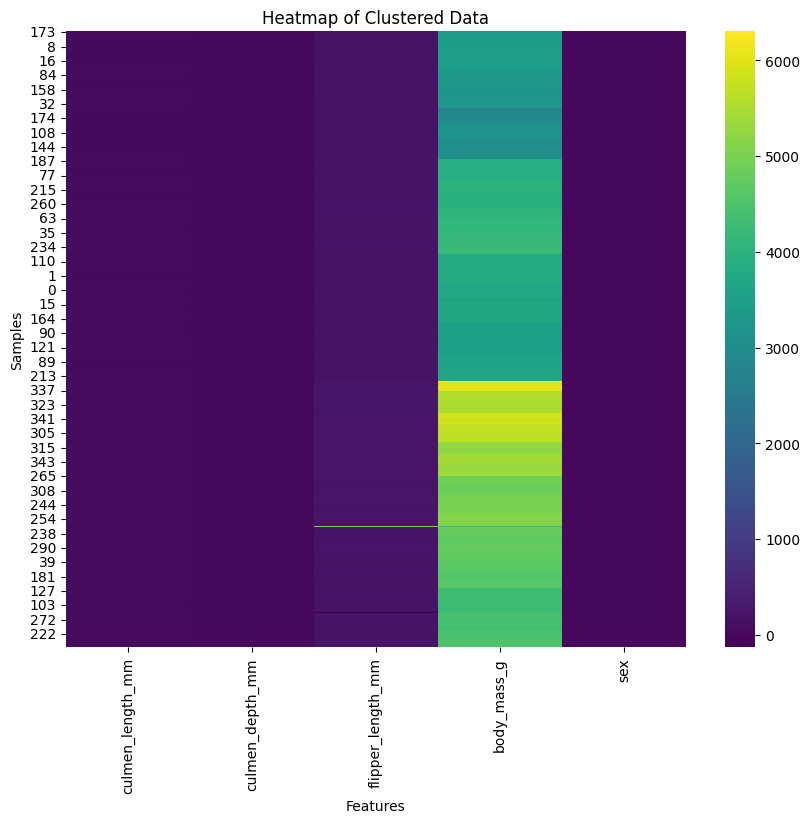

In [50]:
import seaborn as sns

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[dendro['leaves']], cmap='viridis')
plt.title('Heatmap of Clustered Data')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

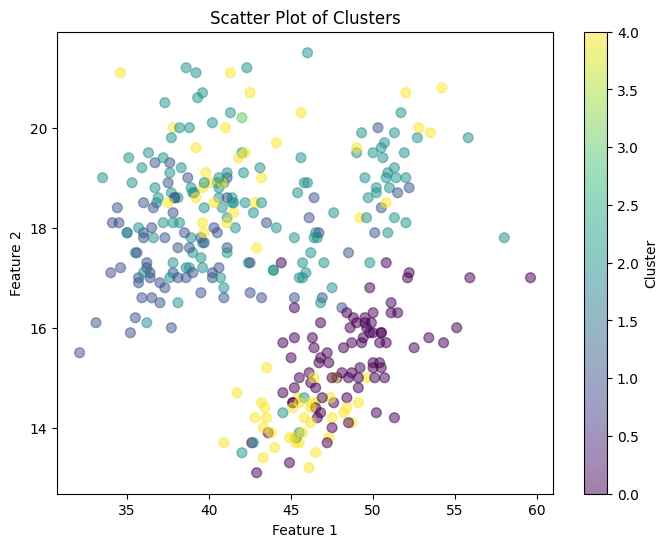

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.title('Scatter Plot of Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()